In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, accuracy_score, confusion_matrix, 
    f1_score, fbeta_score, 
    matthews_corrcoef, brier_score_loss
)
from sklearn.calibration import CalibrationDisplay
from imblearn.over_sampling import RandomOverSampler

In [3]:
target = pd.read_csv('../data/target_logreg.csv', index_col=False)
data = pd.read_csv('../data/data_logreg.csv', index_col=False)

/tmp/ipykernel_11765/870230139.py:2: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../data/data_logreg.csv', index_col=False)


In [4]:
data.shape

(70822, 469)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('imputer', SimpleImputer(strategy='median'))
])
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

log_reg_model = LogisticRegression(max_iter=500)
log_reg_model.fit(X_train, y_train)

y_pred = log_reg_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

/home/prahlad/anaconda3/envs/pyml/lib/python3.9/site-packages/sklearn/utils/extmath.py:1051: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/prahlad/anaconda3/envs/pyml/lib/python3.9/site-packages/sklearn/utils/extmath.py:1056: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/home/prahlad/anaconda3/envs/pyml/lib/python3.9/site-packages/sklearn/utils/extmath.py:1076: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
/home/prahlad/anaconda3/envs/pyml/lib/python3.9/site-packages/sklearn/impute/_base.py:555: UserWarning: Skipping features without any observed values: [19]. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/prahlad/anaconda3/envs/pyml/lib/python3.9/site-packages/sklearn/impute/_base.py:555: UserWarning: Skipping features without any observed values: [1

Accuracy: 0.998729262266149
Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     14148
        True       0.43      0.18      0.25        17

    accuracy                           1.00     14165
   macro avg       0.71      0.59      0.62     14165
weighted avg       1.00      1.00      1.00     14165

Confusion Matrix:
[[14144     4]
 [   14     3]]


/home/prahlad/anaconda3/envs/pyml/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The above logistic regression did pretty bad. 

Need to make modifications for imbalanced class

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state = 321, train_size = 0.8, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state = 321, train_size = 0.6/0.8, shuffle=False)

#split done twice to prevent data leakage

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('imputer', SimpleImputer(strategy='median'))
])
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)



lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)

/home/prahlad/anaconda3/envs/pyml/lib/python3.9/site-packages/sklearn/utils/extmath.py:1051: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/prahlad/anaconda3/envs/pyml/lib/python3.9/site-packages/sklearn/utils/extmath.py:1056: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/home/prahlad/anaconda3/envs/pyml/lib/python3.9/site-packages/sklearn/utils/extmath.py:1076: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
/home/prahlad/anaconda3/envs/pyml/lib/python3.9/site-packages/sklearn/impute/_base.py:555: UserWarning: Skipping features without any observed values: [19]. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/prahlad/anaconda3/envs/pyml/lib/python3.9/site-packages/sklearn/impute/_base.py:555: UserWarning: Skipping features without any observed values: [1

LogisticRegression(max_iter=500)

In [7]:
y_pred = lr.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'MCC: {matthews_corrcoef(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9984468761030709
MCC: 0.3919274731568994
[[14139     0]
 [   22     4]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     14139
        True       1.00      0.15      0.27        26

    accuracy                           1.00     14165
   macro avg       1.00      0.58      0.63     14165
weighted avg       1.00      1.00      1.00     14165



Accuracy: 0.9984468761030709
MCC: 0.3919274731568994

[[14139     0]

 [   22     4]]
 
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     14139
        True       1.00      0.15      0.27        26

    accuracy                           1.00     14165
   macro avg       1.00      0.58      0.63     14165
weighted avg       1.00      1.00      1.00     14165

Better. imbalanced classes were not addressed yet

In [8]:
lr_balanced = LogisticRegression(class_weight='balanced', max_iter=800)
lr_balanced.fit(X_train, y_train)
y_pred = lr_balanced.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'MCC: {matthews_corrcoef(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

/home/prahlad/anaconda3/envs/pyml/lib/python3.9/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.998729262266149
MCC: 0.5656503288751594
[[14137     2]
 [   16    10]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     14139
        True       0.83      0.38      0.53        26

    accuracy                           1.00     14165
   macro avg       0.92      0.69      0.76     14165
weighted avg       1.00      1.00      1.00     14165



Better with balanced class

Accuracy: 0.998729262266149
MCC: 0.5656503288751594

[[14137     2]

 [   16    10]]
 
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     14139
        True       0.83      0.38      0.53        26

    accuracy                           1.00     14165
   macro avg       0.92      0.69      0.76     14165
weighted avg       1.00      1.00      1.00     14165

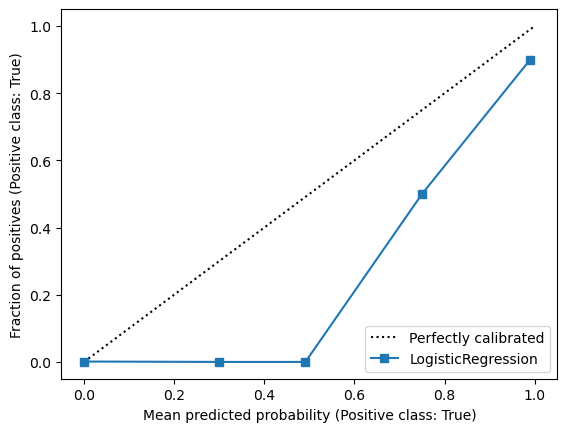

In [9]:
CalibrationDisplay.from_estimator(lr_balanced, X_test, y_test);

In [10]:
print(f'Brier score weighted: {brier_score_loss(y_test, lr_balanced.predict_proba(X_test)[:, 1])}')

Brier score weighted: 0.001285974294294041


In [11]:
oversampler = RandomOverSampler(random_state = 321)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)
y_resampled.value_counts()
lr_oversample = LogisticRegression(max_iter=500).fit(X_resampled, y_resampled)

y_pred = lr_oversample.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'MCC: {matthews_corrcoef(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

/home/prahlad/anaconda3/envs/pyml/lib/python3.9/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.998729262266149
MCC: 0.5656503288751594
[[14137     2]
 [   16    10]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     14139
        True       0.83      0.38      0.53        26

    accuracy                           1.00     14165
   macro avg       0.92      0.69      0.76     14165
weighted avg       1.00      1.00      1.00     14165



/home/prahlad/anaconda3/envs/pyml/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.998729262266149
MCC: 0.5656503288751594

[[14137     2]

 [   16    10]]
 
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     14139
        True       0.83      0.38      0.53        26

    accuracy                           1.00     14165
   macro avg       0.92      0.69      0.76     14165
weighted avg       1.00      1.00      1.00     14165

Brier score oversampled: 0.0012600677726219121


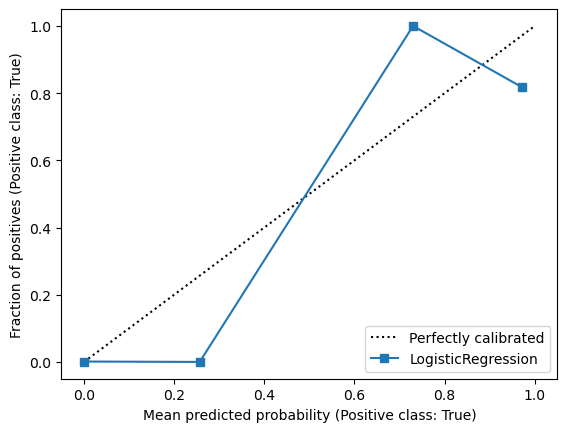

In [12]:
# Again, this method is assigning too large of probabilities to the minority class.
CalibrationDisplay.from_estimator(lr_oversample, X_test, y_test);
print(f'Brier score oversampled: {brier_score_loss(y_test, lr_oversample.predict_proba(X_test)[:, 1])}')